In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import math

## Data Processing

In [2]:
pVaccinesSent = pd.read_csv('./vaccines_sent_pfizer.csv')
mVaccinesSent = pd.read_csv('./vaccines_sent_moderna.csv')
jVaccinesSent = pd.read_csv('./vaccines_sent_jnj.csv')

In [3]:
pVaccinesSent.head(5)

,Jurisdiction,Week of Allocations,1st Dose Allocations,2nd Dose Allocations
0,Connecticut,05/10/2021,54990,54990
1,Maine,05/10/2021,21060,21060
2,Massachusetts,05/10/2021,105300,105300
3,New Hampshire,05/10/2021,21060,21060
4,Rhode Island,05/10/2021,16380,16380


In [4]:
def getNationalTotal(vaccinesSent, name, twodose=True):
    if twodose:
        vaccinesSentNational = pd.DataFrame({'Week': [], (name + ' 1st Dose'): [], (name + ' 2nd Dose'): []})
    else:
        vaccinesSentNational = pd.DataFrame({'Week': [], (name + ' Dose'): []})
    nationalTotal1 = 0
    nationalTotal2 = 0
    for i in range(len(vaccinesSent)-1):
        if vaccinesSent.loc[i, 'Week of Allocations'] == vaccinesSent.loc[i+1, 'Week of Allocations']:
            nationalTotal1 += vaccinesSent.loc[i, '1st Dose Allocations']
            if twodose:
                nationalTotal2 += vaccinesSent.loc[i, '2nd Dose Allocations']
        else:
            nationalTotal1 += vaccinesSent.loc[i, '1st Dose Allocations']
            if twodose:
                nationalTotal2 += vaccinesSent.loc[i, '2nd Dose Allocations']
                vaccinesSentNational = vaccinesSentNational.append({'Week': vaccinesSent.loc[i, 'Week of Allocations'], (name + ' 1st Dose'): nationalTotal1, (name + ' 2nd Dose'): nationalTotal2}, ignore_index=True)
            else:
                vaccinesSentNational = vaccinesSentNational.append({'Week': vaccinesSent.loc[i, 'Week of Allocations'], (name + ' Dose'): nationalTotal1}, ignore_index=True)
            nationalTotal1 = 0
            nationalTotal2 = 0
    if twodose:
        vaccinesSentNational = vaccinesSentNational.append({'Week': vaccinesSent.loc[i, 'Week of Allocations'], (name + ' 1st Dose'): nationalTotal1, (name + ' 2nd Dose'): nationalTotal2}, ignore_index=True)
    else:
        vaccinesSentNational = vaccinesSentNational.append({'Week': vaccinesSent.loc[i, 'Week of Allocations'], (name + ' Dose'): nationalTotal1}, ignore_index=True)
    return vaccinesSentNational

In [5]:
pVaccinesSentNational = getNationalTotal(pVaccinesSent, name='Pfizer')
mVaccinesSentNational = getNationalTotal(mVaccinesSent, name='Moderna')
jVaccinesSentNational = getNationalTotal(jVaccinesSent, twodose=False, name='J&J')

In [6]:
vaccinesSent = pd.merge(pVaccinesSentNational, mVaccinesSentNational, on="Week", how="left")
vaccinesSent = pd.merge(vaccinesSent, jVaccinesSentNational, on="Week", how="left")
vaccinesSent.fillna(0, inplace=True)
vaccinesSent['Total Shipped'] = vaccinesSent.sum(axis=1)
vaccinesSent.head()

,Week,Pfizer 1st Dose,Pfizer 2nd Dose,Moderna 1st Dose,Moderna 2nd Dose,J&J Dose,Total Shipped
0,05/10/2021,5084820.0,5084820.0,3845800.0,3845800.0,603600.0,18464840.0
1,05/03/2021,5087160.0,5087160.0,3767000.0,3767000.0,765500.0,18473820.0
2,04/26/2021,5068440.0,5068440.0,3751800.0,3751800.0,0.0,17640480.0
3,04/19/2021,5053230.0,5053230.0,3740100.0,3740100.0,0.0,17586660.0
4,04/12/2021,4717440.0,4717440.0,3478500.0,3478500.0,700000.0,17091880.0


In [7]:
vaccinesSent['Week'] = pd.to_datetime(vaccinesSent['Week'])
vaccinesSent['Week'] = vaccinesSent['Week'].apply(lambda x: dt.datetime(x.year,x.month,x.day))
vaccinesSent = vaccinesSent.sort_values(by='Week', ascending=1)
vaccinesSent.reset_index(inplace=True, drop=True)
vaccinesSent.head()

,Week,Pfizer 1st Dose,Pfizer 2nd Dose,Moderna 1st Dose,Moderna 2nd Dose,J&J Dose,Total Shipped
0,2020-12-14,2975700.0,2938650.0,0.0,0.0,0.0,5914350.0
1,2020-12-21,2071875.0,2071875.0,5980000.0,5938600.0,0.0,16062350.0
2,2020-12-28,2643225.0,2643225.0,2047300.0,2047300.0,0.0,9381050.0
3,2021-01-04,2131350.0,2092350.0,2104400.0,2064400.0,0.0,8392500.0
4,2021-01-11,2084550.0,2084550.0,2047200.0,2047200.0,0.0,8263500.0


In [8]:
vaccinesSent['Shipped Dose 1'] = vaccinesSent['Pfizer 1st Dose'] + vaccinesSent['Moderna 1st Dose'] + vaccinesSent['J&J Dose']
vaccinesSent['Shipped Dose 2'] = vaccinesSent['Pfizer 2nd Dose'] +  + vaccinesSent['Moderna 2nd Dose']
vaccinesSent.head()

,Week,Pfizer 1st Dose,Pfizer 2nd Dose,Moderna 1st Dose,Moderna 2nd Dose,J&J Dose,Total Shipped,Shipped Dose 1,Shipped Dose 2
0,2020-12-14,2975700.0,2938650.0,0.0,0.0,0.0,5914350.0,2975700.0,2938650.0
1,2020-12-21,2071875.0,2071875.0,5980000.0,5938600.0,0.0,16062350.0,8051875.0,8010475.0
2,2020-12-28,2643225.0,2643225.0,2047300.0,2047300.0,0.0,9381050.0,4690525.0,4690525.0
3,2021-01-04,2131350.0,2092350.0,2104400.0,2064400.0,0.0,8392500.0,4235750.0,4156750.0
4,2021-01-11,2084550.0,2084550.0,2047200.0,2047200.0,0.0,8263500.0,4131750.0,4131750.0


In [9]:
vaccinesAdministered = pd.read_csv('./vaccines_administered.csv')
vaccinesAdministered.head()

,Date Type,Date,Program,Total Doses Administered Daily,Daily Count People Receiving Dose 1,Daily Count People Receiving Dose 2,Total Doses Administered Cumulative,People Receiving 1 or More Doses Cumulative,People Receiving 2 Doses Cumulative,7-Day Avg Daily Count Dose 1,7-Day Avg Total Doses Daily,7-Day Avg Daily Count Dose 2,Total Doses Administered Daily Change,7-Day Avg Total Doses Administered Daily Change,Daily Count of People Fully Vaccinated,People with at least One Dose Cumulative,People Fully Vaccinated Cumulative,7-Day Avg Daily Count of People Fully Vaccinated
0,Admin,2020-12-13,US,12707.0,11183.0,1355.0,12707.0,11183.0,1355.0,11183.0,12707.0,1355.0,NaN,NaN,1431.0,11183.0,1431.0,1431.0
1,Report,2020-12-13,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,Admin,2020-12-13,LTC,229.0,229.0,0.0,229.0,229.0,0.0,229.0,229.0,0.0,NaN,NaN,0.0,229.0,0.0,0.0
3,Admin,2020-12-14,US,3801.0,3673.0,5.0,16508.0,14856.0,1360.0,7428.0,8254.0,680.0,NaN,NaN,23.0,14856.0,1454.0,727.0
4,Report,2020-12-14,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,509.0,255.0,NaN,NaN,NaN,NaN


In [10]:
vaccinesAdministered = vaccinesAdministered[vaccinesAdministered['Program'] == 'US']
vaccinesAdministered = vaccinesAdministered[vaccinesAdministered['Date Type'] == 'Admin']

vaccinesAdministered['Date'] = pd.to_datetime(vaccinesAdministered['Date'])
vaccinesAdministered['Date'] = vaccinesAdministered['Date'].apply(lambda x: dt.datetime(x.year,x.month,x.day))

vaccinesAdministered['Received Dose 1'] = vaccinesAdministered['Daily Count People Receiving Dose 1']
vaccinesAdministered['Received Dose 2'] = vaccinesAdministered['Daily Count People Receiving Dose 2']
vaccinesAdministered['Fully Vaccinated Total'] = vaccinesAdministered['People Fully Vaccinated Cumulative']
vaccinesAdministered = vaccinesAdministered[['Date', 'Received Dose 1', 'Received Dose 2', 'Fully Vaccinated Total']]

vaccinesAdministered.reset_index(inplace=True, drop=True)

vaccinesAdministered.head()

,Date,Received Dose 1,Received Dose 2,Fully Vaccinated Total
0,2020-12-13,11183.0,1355.0,1431.0
1,2020-12-14,3673.0,5.0,1454.0
2,2020-12-15,45967.0,27.0,1502.0
3,2020-12-16,152762.0,207.0,1730.0
4,2020-12-17,261535.0,510.0,2261.0


In [11]:
#for i in range(len(vaccinesAdministered)):
vaccinesAdministered['New Fully Vaccinated'] = pd.Series() 
vaccinesAdministered.loc[0, 'New Fully Vaccinated'] = vaccinesAdministered.loc[0, 'Fully Vaccinated Total']
for i in range(1, len(vaccinesAdministered)):
    diff = vaccinesAdministered.loc[i, 'Fully Vaccinated Total'] - vaccinesAdministered.loc[i-1, 'Fully Vaccinated Total']
    vaccinesAdministered.loc[i, 'New Fully Vaccinated'] = diff

In [12]:
vaccinesAdministered.head()

,Date,Received Dose 1,Received Dose 2,Fully Vaccinated Total,New Fully Vaccinated
0,2020-12-13,11183.0,1355.0,1431.0,1431.0
1,2020-12-14,3673.0,5.0,1454.0,23.0
2,2020-12-15,45967.0,27.0,1502.0,48.0
3,2020-12-16,152762.0,207.0,1730.0,228.0
4,2020-12-17,261535.0,510.0,2261.0,531.0


In [13]:
vaccinesSent = vaccinesSent.sort_values(by='Week', ascending=1)
vaccinesSent.reset_index(inplace=True, drop=True)
vaccinesSent.head()

,Week,Pfizer 1st Dose,Pfizer 2nd Dose,Moderna 1st Dose,Moderna 2nd Dose,J&J Dose,Total Shipped,Shipped Dose 1,Shipped Dose 2
0,2020-12-14,2975700.0,2938650.0,0.0,0.0,0.0,5914350.0,2975700.0,2938650.0
1,2020-12-21,2071875.0,2071875.0,5980000.0,5938600.0,0.0,16062350.0,8051875.0,8010475.0
2,2020-12-28,2643225.0,2643225.0,2047300.0,2047300.0,0.0,9381050.0,4690525.0,4690525.0
3,2021-01-04,2131350.0,2092350.0,2104400.0,2064400.0,0.0,8392500.0,4235750.0,4156750.0
4,2021-01-11,2084550.0,2084550.0,2047200.0,2047200.0,0.0,8263500.0,4131750.0,4131750.0


In [14]:
vaccinesAdministered['Week'] = pd.Series()
week = vaccinesSent.loc[0, 'Week']
weekCt = 0
for i in range(len(vaccinesAdministered)):
    dayDiff = (vaccinesAdministered.loc[i, 'Date'] - vaccinesSent.loc[weekCt, 'Week']).days % 7
    if dayDiff == 1:
        weekCt += 1
        week = vaccinesSent.loc[weekCt, 'Week']
    vaccinesAdministered.loc[i, 'Week'] = week
vaccinesAdministered['Week'] = pd.to_datetime(vaccinesAdministered['Week'])
vaccinesAdministered.head()

,Date,Received Dose 1,Received Dose 2,Fully Vaccinated Total,New Fully Vaccinated,Week
0,2020-12-13,11183.0,1355.0,1431.0,1431.0,2020-12-14
1,2020-12-14,3673.0,5.0,1454.0,23.0,2020-12-14
2,2020-12-15,45967.0,27.0,1502.0,48.0,2020-12-21
3,2020-12-16,152762.0,207.0,1730.0,228.0,2020-12-21
4,2020-12-17,261535.0,510.0,2261.0,531.0,2020-12-21


In [15]:
vaccinesSent.head()

,Week,Pfizer 1st Dose,Pfizer 2nd Dose,Moderna 1st Dose,Moderna 2nd Dose,J&J Dose,Total Shipped,Shipped Dose 1,Shipped Dose 2
0,2020-12-14,2975700.0,2938650.0,0.0,0.0,0.0,5914350.0,2975700.0,2938650.0
1,2020-12-21,2071875.0,2071875.0,5980000.0,5938600.0,0.0,16062350.0,8051875.0,8010475.0
2,2020-12-28,2643225.0,2643225.0,2047300.0,2047300.0,0.0,9381050.0,4690525.0,4690525.0
3,2021-01-04,2131350.0,2092350.0,2104400.0,2064400.0,0.0,8392500.0,4235750.0,4156750.0
4,2021-01-11,2084550.0,2084550.0,2047200.0,2047200.0,0.0,8263500.0,4131750.0,4131750.0


In [16]:
vaccines = pd.merge(vaccinesAdministered, vaccinesSent, on="Week", how="left")
vaccines = vaccines[['Date', 'Week', 'Received Dose 1', 'Received Dose 2', 'Fully Vaccinated Total', 'New Fully Vaccinated', 'Total Shipped', 'Shipped Dose 1', 'Shipped Dose 2']]
vaccines.head()

,Date,Week,Received Dose 1,Received Dose 2,Fully Vaccinated Total,New Fully Vaccinated,Total Shipped,Shipped Dose 1,Shipped Dose 2
0,2020-12-13,2020-12-14,11183.0,1355.0,1431.0,1431.0,5914350.0,2975700.0,2938650.0
1,2020-12-14,2020-12-14,3673.0,5.0,1454.0,23.0,5914350.0,2975700.0,2938650.0
2,2020-12-15,2020-12-21,45967.0,27.0,1502.0,48.0,16062350.0,8051875.0,8010475.0
3,2020-12-16,2020-12-21,152762.0,207.0,1730.0,228.0,16062350.0,8051875.0,8010475.0
4,2020-12-17,2020-12-21,261535.0,510.0,2261.0,531.0,16062350.0,8051875.0,8010475.0


In [17]:
totalDose1 = 0
totalDose2 = 0
totalFull = 0
totalNewFull = 0
weekCounter = 0
weeklyVaccines = pd.DataFrame({'Week': [],  \
                            'Shipped Dose 1': [], 'Shipped Dose 2': [], 'Received Dose 1': [], 'Received Dose 2': [], \
                            'Fully Vaccinated Total': [], 'New Fully Vaccinated': [],})
for i in range(len(vaccines)-1):
    totalDose1 += vaccines.loc[i, 'Received Dose 1']
    totalDose2 += vaccines.loc[i, 'Received Dose 2']
    totalFull = vaccines.loc[i, 'Fully Vaccinated Total']
    totalNewFull += vaccines.loc[i, 'New Fully Vaccinated']
    if (vaccines.loc[i, 'Week'] != vaccines.loc[i+1, 'Week']):
        weeklyVaccines = weeklyVaccines.append({'Week': vaccines.loc[i, 'Week'], \
                               'Week #': weekCounter, \
                               'Total Shipped': vaccines.loc[i, 'Total Shipped'], \
                               'Shipped Dose 1': vaccines.loc[i, 'Shipped Dose 1'], \
                               'Shipped Dose 2': vaccines.loc[i, 'Shipped Dose 2'], \
                               'Received Dose 1': totalDose1, \
                               'Received Dose 2': totalDose2, \
                               'Fully Vaccinated Total': totalFull, \
                               'New Fully Vaccinated': totalNewFull, \
                              }, ignore_index=True)
        totalDose = 0
        totalDose2 = 0
        totalFull = 0
        totalNewFull = 0
        weekCounter += 1
weeklyVaccines.head()

,Week,Shipped Dose 1,Shipped Dose 2,Received Dose 1,Received Dose 2,Fully Vaccinated Total,New Fully Vaccinated,Total Shipped,Week #
0,2020-12-14,2975700.0,2938650.0,14856.0,1360.0,1454.0,1454.0,5914350.0,0.0
1,2020-12-21,8051875.0,8010475.0,1526326.0,3515.0,5077.0,3623.0,16062350.0,1.0
2,2020-12-28,4690525.0,4690525.0,3502976.0,7934.0,13077.0,8000.0,9381050.0,2.0
3,2021-01-04,4235750.0,4156750.0,6376620.0,59472.0,72688.0,59611.0,8392500.0,3.0
4,2021-01-11,4131750.0,4131750.0,10757082.0,1375720.0,1448511.0,1375823.0,8263500.0,4.0


## Fitting and plotting

Now that we have the data we need, we can perform 2nd, 3rd, and 4th degree polynomial
 least squares approximation, using `Week #` as the independent variable and `Fully Vaccinated Total` as the dependent variable of measurement.

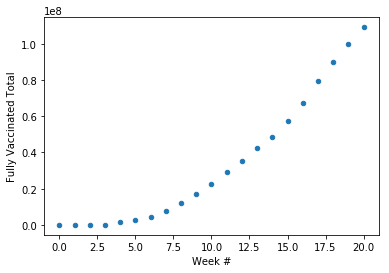

In [18]:
weeklyVaccines.plot(kind="scatter", x='Week #', y='Fully Vaccinated Total')

In [19]:
np_weeks = weeklyVaccines['Week #'].to_numpy()
np_vaxx = weeklyVaccines['Fully Vaccinated Total'].to_numpy()

In [20]:
np_vaxx

array([1.4540000e+03, 5.0770000e+03, 1.3077000e+04, 7.2688000e+04,
       1.4485110e+06, 2.5864300e+06, 4.4701680e+06, 7.5134980e+06,
       1.1962269e+07, 1.7216949e+07, 2.2615091e+07, 2.9064207e+07,
       3.5379592e+07, 4.2583798e+07, 4.8835347e+07, 5.7269179e+07,
       6.7267355e+07, 7.9762124e+07, 8.9758631e+07, 9.9669047e+07,
       1.0918274e+08])

In [21]:
A = np.vstack([np_weeks, np.ones(len(np_weeks))]).T
A

array([[ 0.,  1.],
       [ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  1.],
       [ 4.,  1.],
       [ 5.,  1.],
       [ 6.,  1.],
       [ 7.,  1.],
       [ 8.,  1.],
       [ 9.,  1.],
       [10.,  1.],
       [11.,  1.],
       [12.,  1.],
       [13.,  1.],
       [14.,  1.],
       [15.,  1.],
       [16.,  1.],
       [17.,  1.],
       [18.,  1.],
       [19.,  1.],
       [20.,  1.]])

1st degree approximation

In [22]:
m, c = np.linalg.lstsq(A, np_vaxx, rcond=None)[0]

In [23]:
m, c

(5550986.237662337, -20906184.66233766)

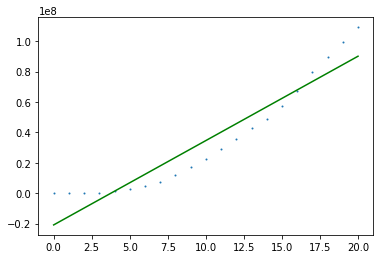

In [24]:
plt.plot(np_weeks, np_vaxx, 'o', label='Original data', markersize=1)

plt.plot(np_weeks, m*np_weeks + c, 'g', label='Fitted line')
plt.show()

In [25]:
model2 = np.polynomial.polynomial.Polynomial.fit(np_weeks, np_vaxx, 2)
a2,b2,c2 = model2
model2

Polynomial([22321787.2124877 , 55509862.37662337, 33496065.00490363], domain=[ 0., 20.], window=[-1.,  1.])

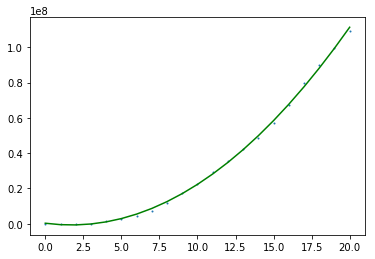

In [26]:
plt.plot(np_weeks, np_vaxx, 'o', label='Original data', markersize=1)
plt.plot(np_weeks, a2+b2*(0.1*np_weeks-1)+c2*((0.1*(np_weeks)-1)**2), 'g')
plt.show()

In [27]:
model3 = np.polynomial.polynomial.Polynomial.fit(np_weeks, np_vaxx, 3)
a3,b3,c3,d3 = model3
model3

Polynomial([22321787.21248769, 56660149.29162769, 33496065.00490368,
       -1748156.40578164], domain=[ 0., 20.], window=[-1.,  1.])

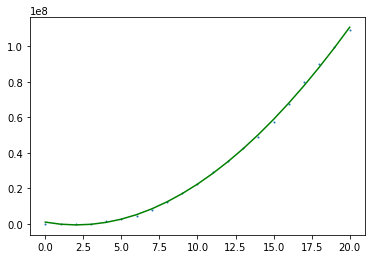

In [28]:
plt.plot(np_weeks, np_vaxx, 'o', label='Original data', markersize=1)
plt.plot(np_weeks, a3+b3*(0.1*np_weeks-1)+c3*((0.1*(np_weeks)-1)**2)+d3*((0.1*(np_weeks)-1)**3), 'g')
plt.show()

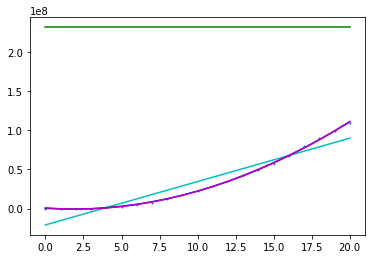

In [29]:
# Approximate herd immunity threshold population is 70% of 331,449,281 (US 2020 census) = 232014496
plt.plot(np_weeks, [232014496]*len(np_weeks), 'g', label='Herd Immunity')
plt.plot(np_weeks, np_vaxx, 'o', label='Original data', markersize=1)
plt.plot(np_weeks, m*np_weeks + c, 'c', label='Fitted line')
plt.plot(np_weeks, a2+b2*(0.1*np_weeks-1)+c2*((0.1*(np_weeks)-1)**2), 'b')
plt.plot(np_weeks, a3+b3*(0.1*np_weeks-1)+c3*((0.1*(np_weeks)-1)**2)+d3*((0.1*(np_weeks)-1)**3), 'm')
plt.show()

In [30]:
longer_x = np.concatenate([np_weeks, (21+np_weeks)])
longer_x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41.])

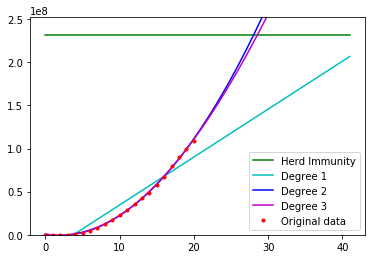

In [31]:
plt.plot(longer_x, [232014496]*len(longer_x), 'g', label='Herd Immunity')
plt.plot(longer_x, m*longer_x + c, 'c', label='Degree 1')
plt.plot(longer_x, a2+b2*(0.1*longer_x-1)+c2*((0.1*(longer_x)-1)**2), 'b', label="Degree 2")
plt.plot(longer_x, a3+b3*(0.1*longer_x-1)+c3*((0.1*(longer_x)-1)**2)+d3*((0.1*(longer_x)-1)**3), 'm', label="Degree 3")
plt.plot(np_weeks, np_vaxx, marker='o', color="r", linestyle="None", label='Original data', markersize=3)
plt.ylim([0, 252000000])
leg = plt.legend()
plt.show()

In [32]:
thresh = 232014496 # Ths USA 2020 Census population is 331,449,281. 70% of it is 232,014,496.
d3estim = model3 - thresh
d3estim.roots()[1]

28.579823823697996

In [33]:
d2estim = model2 - thresh
d2estim.roots()[1]

28.070758618423703

In [34]:
d1estim = m*longer_x + c - thresh
d1estim
# root for 1st degree polynomial is at week 46 -  week of October 25 (5,550,986.237662337x-20,906,184.66233766-232014496)

array([-2.52920681e+08, -2.47369694e+08, -2.41818708e+08, -2.36267722e+08,
       -2.30716736e+08, -2.25165749e+08, -2.19614763e+08, -2.14063777e+08,
       -2.08512791e+08, -2.02961805e+08, -1.97410818e+08, -1.91859832e+08,
       -1.86308846e+08, -1.80757860e+08, -1.75206873e+08, -1.69655887e+08,
       -1.64104901e+08, -1.58553915e+08, -1.53002928e+08, -1.47451942e+08,
       -1.41900956e+08, -1.36349970e+08, -1.30798983e+08, -1.25247997e+08,
       -1.19697011e+08, -1.14146025e+08, -1.08595038e+08, -1.03044052e+08,
       -9.74930660e+07, -9.19420798e+07, -8.63910935e+07, -8.08401073e+07,
       -7.52891211e+07, -6.97381348e+07, -6.41871486e+07, -5.86361623e+07,
       -5.30851761e+07, -4.75341899e+07, -4.19832036e+07, -3.64322174e+07,
       -3.08812312e+07, -2.53302449e+07])

From this, we see that Week 28 is the general estimate for 2nd and 3rd degree polynomials = week of June 21, 2021

In [35]:
# Let's see if we can check accuracy against week 20
model3(20) # Week 20 estimate with degree 3 polynomial

110729845.10323742

In [36]:
weeklyVaccines.loc[20]['Fully Vaccinated Total']

109182740.0

In [37]:
abs(weeklyVaccines.loc[20]['Fully Vaccinated Total'] - model3(20))

1547105.1032374203

## Error Analysis

| Model | Model Equation  | MSE | Expected week of receiving immunity |
| --- | --- | --- | --- |
|1st degree linear regression| `code block`|data3| |
|2nd degree linear regression|`equation here`|data|| 

In [38]:
# For degree 1:
sum = 0
for i in range(len(A)):
    # print(abs((m*longer_x + c)[i] - weeklyVaccines.loc[i]['Fully Vaccinated Total']))
    sum += abs((m*longer_x + c)[i] - weeklyVaccines.loc[i]['Fully Vaccinated Total'])
print(sum/len(A), 'is the mean squared error')

9693920.666419296 is the mean squared error


In [39]:
# For degree 2:
sum = 0
for i in range(len(A)):
    sum += abs(model2(i) - weeklyVaccines.loc[i]['Fully Vaccinated Total'])
print(sum/len(A), 'is the mean squared error')

783867.268217411 is the mean squared error


In [40]:
# For degree 3:
sum = 0
for i in range(len(A)):
    sum += abs(model3(i) - weeklyVaccines.loc[i]['Fully Vaccinated Total'])
print(sum/len(A), 'is the mean squared error')

764895.2694965963 is the mean squared error


### Next Steps
- Try dividing datapoints into intervals corressponding to general milestones in vaccine effort
- Use nonlinear regression by log transforming data